# Plasma

In [48]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/Shareddrives/utshabkg/Dataset/serumLC.csv')
df1 = pd.read_csv('/content/drive/Shareddrives/utshabkg/Dataset/plasma_processed.csv')
df = df.T
col = {}
for i in range(df.shape[1]):
    col[i] = df.iloc[0, i]
# print(col)
df = df.rename(columns = col, inplace = False)
df = df.iloc[1:, :]
df.head()

,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,2-ketoglucose dimethylacetal NIST,2-ketoisocaproic acid,3-(3-hydroxyphenyl)propionic acid,3-aminoisobutyric acid,3-hydroxybutanoic acid,3-hydroxybutyric acid,3-phosphoglycerate,5-hydroxynorvaline NIST,5-methoxytryptamine,acetoacetate,aconitic acid,adenosine-5-monophosphate,alanine,alloxanoic acid NIST,alpha-ketoglutarate,aminomalonate,arabitol,arachidic acid,arachidonic acid,asparagine,aspartic acid,azelaic acid,behenic acid,benzoic acid,beta-alanine,butane-2_3-diol NIST,butyrolactam NIST,capric acid,caprylic acid,cellobiose,...,p-cresol,pelargonic acid,phenol,phenylalanine,phenylethylamine,phosphate,phosphoethanolamine,pipecolinic acid,piperidone,proline,propane-1_3-diol NIST,pseudo uridine,pyrophosphate,pyrrole-2-carboxylic acid,pyruvic acid,quinic acid,ribose,salicylaldehyde,salicylic acid,serine,shikimic acid,stearic acid,sucrose,tartaric acid,taurine,threitol,threonic acid,threonine,tocopherol alpha-,tocopherol gamma-,trans-4-hydroxyproline,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose
140516bjlsa04_1,9582,279,82,61,357,122,24944,56,32,966,70,6338,48,271,1602,2646,33,98,629,306,104,24,203008,41,248,752,235,1346,154,1336,1595,86,264,1050,937,281,342,187,416,441,...,36267,2238,1717,13187,99,7965,54,772,88,173034,608,478,2141,91,3149,196,113,69,31,8217,1405,99859,122,84,4540,337,849,12787,2028,251,2492,34239,54924,43,226295,11606,68,153849,194,811
140516bjlsa48_1,28847,161,78,84,205,258,10680,104,49,1076,75,6082,102,1104,300,1977,39,72,70,472,118,66,273015,85,160,965,262,948,276,1928,3204,117,460,1726,257,326,338,299,571,477,...,57611,3840,2126,15811,179,11304,72,672,95,141407,790,1052,1263,65,1849,41,177,403,234,9588,2758,71934,253,51,6454,219,651,12737,1850,641,3428,20080,37597,203,96226,10188,71,110735,294,910
140515bjlsa10_1,13627,162,53,133,139,159,27201,160,80,1117,60,6812,126,425,1127,4550,55,146,130,470,84,54,257699,54,184,724,361,1263,1642,1900,2336,251,317,3216,413,231,186,338,865,312,...,52348,11679,2770,11101,110,8000,60,546,54,88067,991,505,2482,83,721,461,186,276,1291,7523,1259,130069,121,50,4608,152,1833,10888,3722,551,2796,29191,28707,211,155596,16617,123,95509,253,804
140516bjlsa02_1,20758,6671,93,78,335,225,32347,242,59,304,53,1014,93,1953,543,34837,75,151,70,400,82,34,122666,103,142,1009,46,1857,908,1513,3493,148,458,2072,264,117,464,296,658,180,...,66050,6030,1985,14371,652,13248,56,481,50,72115,888,957,2277,71,156,82,181,135,102,13751,1681,173705,109,85,6287,265,1880,12901,2128,420,3161,16637,27873,71,191671,15214,84,96219,157,806
140516bjlsa18_1,15692,108,98,69,250,120,18357,60,25,1220,74,6319,713,800,1389,5288,34,421,194,302,123,31,247523,52,138,1980,350,688,334,1809,1202,156,255,1413,867,218,189,231,468,78,...,35498,3510,745,14421,111,19080,38,183,72,100497,513,904,1141,59,1147,2428,266,167,65,9956,1249,65181,36,29,2854,408,495,15442,1483,401,5552,29820,30132,200,333019,20281,62,159853,188,1226


In [49]:
df.shape

(82, 158)

In [50]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=2, random_state=0).fit(df)
# kmeans.labels_

In [51]:
df.isnull().sum()/len(df) * 100

1_5-anhydroglucitol               0.00
1-monostearin                     0.00
2_3-dihydroxybutanoic acid NIST   0.00
2_4-diaminobutyric acid           0.00
2-deoxyerythritol                 0.00
                                  ... 
uric acid                         0.00
uridine                           0.00
valine                            0.00
xylitol                           0.00
xylose                            0.00
Length: 158, dtype: float64

In [52]:
labels = np.reshape(df1.Class.to_numpy(), (82,1))
# labels = np.reshape(kmeans.labels_, (82,1))
# labels

In [53]:
col = []
for i in range(len(df.columns)):
    col.append(df.columns[i])
col.append('Class')
df = np.concatenate([df, labels], axis=1)
df = pd.DataFrame(df, columns = col)
# df.to_csv('serum_preocessed.csv')
df.head

<bound method NDFrame.head of    1_5-anhydroglucitol 1-monostearin  ... xylose    Class
0                 9582           279  ...    811  disease
1                28847           161  ...    910  disease
2                13627           162  ...    804  disease
3                20758          6671  ...    806  disease
4                15692           108  ...   1226  disease
..                 ...           ...  ...    ...      ...
77               25194           108  ...    748  control
78               23525            83  ...    651  control
79               25154           418  ...    749  control
80               12397           110  ...    526  control
81               18350            73  ...   1823  control

[82 rows x 159 columns]>

# PCA

In [54]:
from sklearn.decomposition import PCA
def pca_analysis(n_components):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.iloc[:, :-1].values)

    pca_concatenate = np.concatenate([pca_result, labels], axis=1)

    return pca_concatenate

In [55]:
def make_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'pc{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

In [56]:
pca2 = pca_analysis(2)

pca2_df = make_dataframe(pca2, 2)
print(pca2_df.head)

<bound method NDFrame.head of           pc1       pc2    Class
0    11332.53   4098.77  disease
1  -132611.62 -31954.64  disease
2  -102831.61  62820.20  disease
3      925.50 -41072.42  disease
4   113919.31  61849.36  disease
..        ...       ...      ...
77   52214.34 -47499.41  control
78   79846.58  58143.49  control
79   85498.10 -52927.35  control
80   70242.53  59060.97  control
81  -19389.15 -56670.29  control

[82 rows x 3 columns]>


<Figure size 432x288 with 0 Axes>

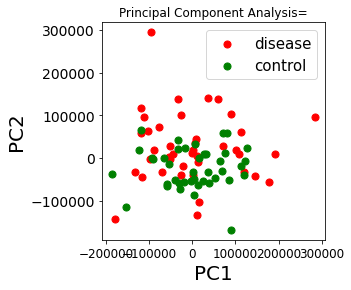

In [57]:
plt.figure()
plt.figure(figsize=(4, 4))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("Principal Component Analysis=",fontsize=12)
targets = ['disease', 'control']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df.Class == target
    plt.scatter(pca2_df.loc[indicesToKeep, 'pc1']
               , pca2_df.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [58]:
def plotting(pca_df, n_components):
    fig, axes = plt.subplots(nrows=n_components-1, ncols=4, figsize=(20, 8))

    for i in range(n_components):
        for j in range(i+1, n_components):
            if j==n_components:
                break
            axes[i, j-1].set_xlabel(f'PC{i+1}',fontsize=20)
            axes[i, j-1].set_ylabel(f'PC{j+1}',fontsize=20)
            for target, color in zip(targets,colors):
                indicesToKeep = df.Class == target
                axes[i, j-1].scatter(pca_df.loc[indicesToKeep, f'pc{i+1}']
                                , pca_df.loc[indicesToKeep, f'pc{j+1}'], c = color, s = 50)

In [59]:
pca3 = pca_analysis(3)

pca3_df = make_dataframe(pca3, 3)
# print(pca3_df.head)

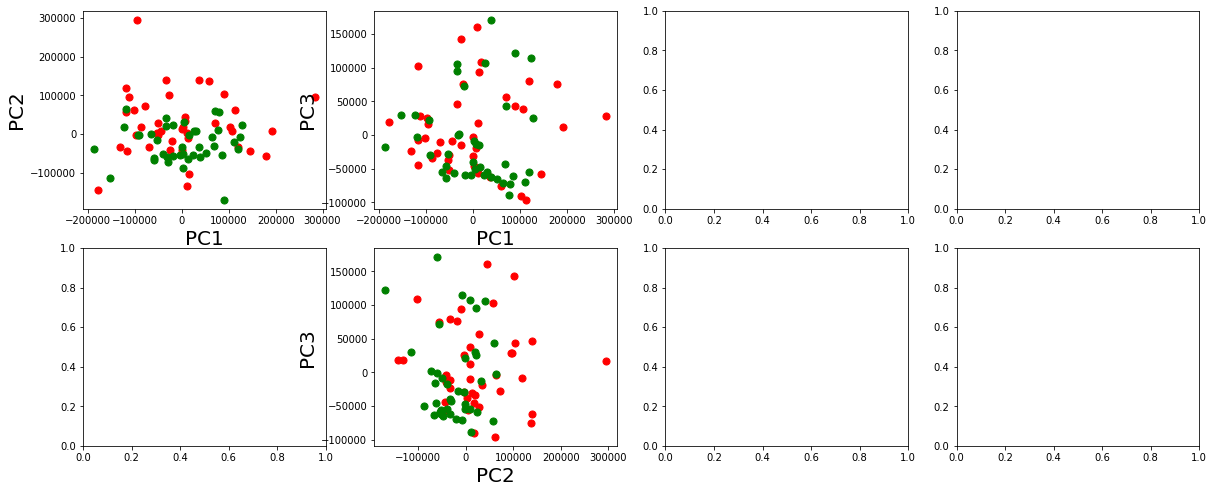

In [60]:
plotting(pca3_df, 3)

In [61]:
pca4 = pca_analysis(4)

pca4_df = make_dataframe(pca4, 4)
# print(pca4_df.head)

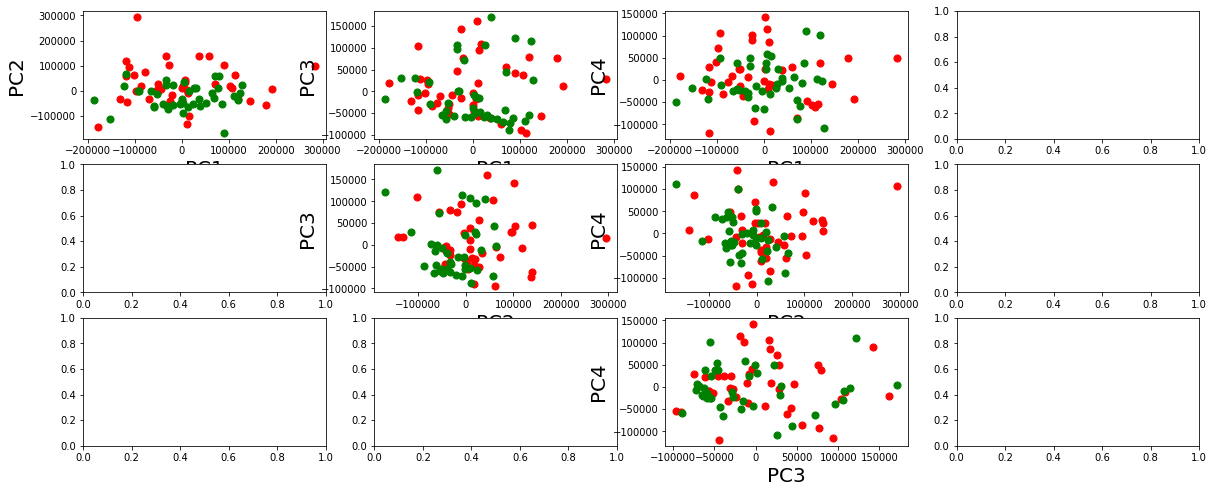

In [62]:
plotting(pca4_df, 4)

In [63]:
pca5 = pca_analysis(5)

pca5_df = make_dataframe(pca5, 5)
# print(pca5_df.head)

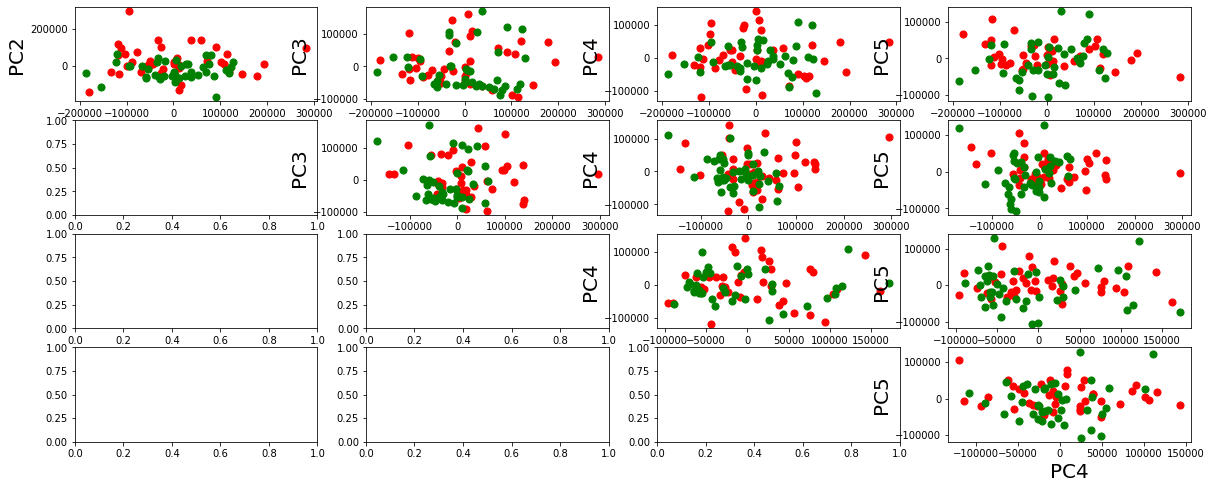

In [64]:
plotting(pca5_df, 5)

In [65]:
# now do PCA for 10, 15, 20
pca10 = pca_analysis(10)
pca10_df = make_dataframe(pca10, 10)

pca15 = pca_analysis(15)
pca15_df = make_dataframe(pca15, 15)

pca20 = pca_analysis(20)
pca20_df = make_dataframe(pca20, 20)
# print(pca20_df.head)

In [66]:
# pca15_df.to_csv("pca15.csv")

#t-SNE

In [67]:
from sklearn.manifold import TSNE
def tsne_analysis(n_components):
    tsne = TSNE(n_components=n_components)
    tsne_result = tsne.fit_transform(df.iloc[:, :-1].values)

    tsne_concatenate = np.concatenate([tsne_result, labels], axis=1)

    return tsne_concatenate

In [68]:
def tsne_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'tsne{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

In [69]:
def tsne_plotting(tsne_df, n_components):
    fig, axes = plt.subplots(nrows=n_components-1, ncols=4, figsize=(20, 8))

    for i in range(n_components):
        for j in range(i+1, n_components):
            if j==n_components:
                break
            axes[i, j-1].set_xlabel(f'TSNE{i+1}',fontsize=20)
            axes[i, j-1].set_ylabel(f'TSNE{j+1}',fontsize=20)
            for target, color in zip(targets,colors):
                indicesToKeep = df.Class == target
                axes[i, j-1].scatter(tsne_df.loc[indicesToKeep, f'tsne{i+1}']
                                , tsne_df.loc[indicesToKeep, f'tsne{j+1}'], c = color, s = 50)

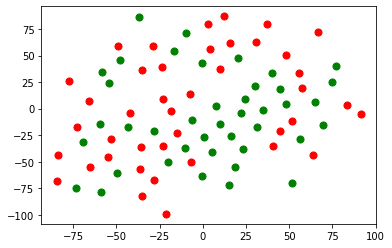

In [70]:
tsne2 = tsne_analysis(2)

tsne2_df = tsne_dataframe(tsne2, 2)
# print(tsne2_df.head)
# plotting(tsne2_df, 1, 1)

for target, color in zip(targets,colors):
    indicesToKeep = df.Class == target
    plt.scatter(tsne2_df.loc[indicesToKeep, 'tsne1']
               , tsne2_df.loc[indicesToKeep, 'tsne2'], c = color, s = 50)

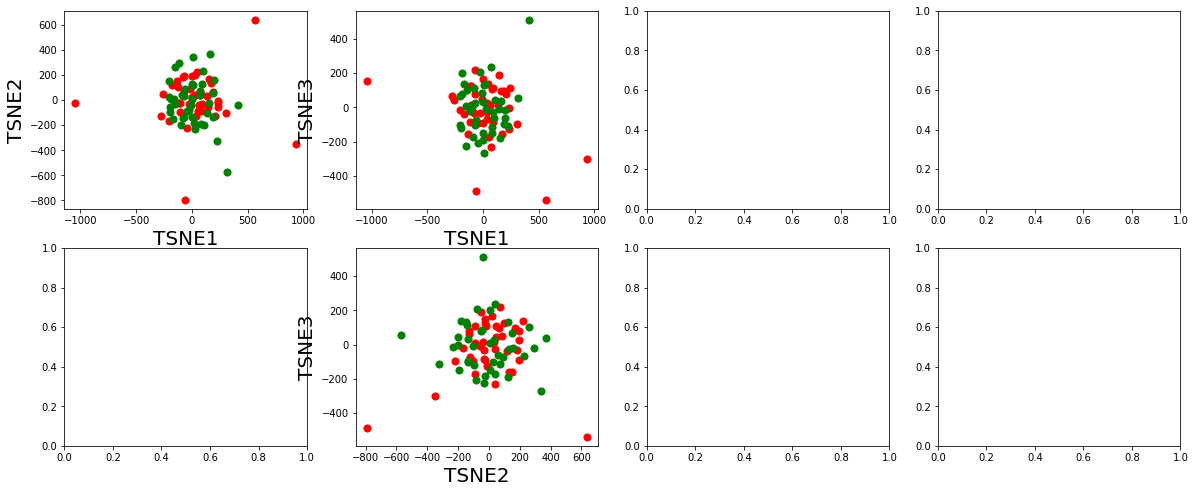

In [71]:
tsne3 = tsne_analysis(3)

tsne3_df = tsne_dataframe(tsne3, 3)
# print(tsne2_df.head)
tsne_plotting(tsne3_df, 3)


In [72]:
# tsne2_df.to_csv('tsne2.csv')

# Models

In [73]:
# !pip install lazypredict

In [74]:
X = df.drop('Class', axis=1)
y = df['Class'].copy()
y = y.map({"control": 1, "disease": 0})

X.shape, y.shape

((82, 158), (82,))

In [75]:
y.value_counts()

1    41
0    41
Name: Class, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split, StratifiedKFold

In [77]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report

In [78]:
result = []
# for i in range(10):
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

models, predictions = clf.fit(X, X_test, y, y_test)
model_dictionary = clf.provide_models(X, X_test, y, y_test)
# print(models.shape)
result.append(models.iloc[:, :])
# print(i, X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# print(predictions)

result

100%|██████████| 29/29 [00:02<00:00, 11.88it/s]


[                               Accuracy  ...  Time Taken
 Model                                    ...            
 AdaBoostClassifier                 1.00  ...        0.19
 BaggingClassifier                  1.00  ...        0.08
 XGBClassifier                      1.00  ...        0.09
 SVC                                1.00  ...        0.05
 SGDClassifier                      1.00  ...        0.08
 RidgeClassifierCV                  1.00  ...        0.15
 RidgeClassifier                    1.00  ...        0.05
 RandomForestClassifier             1.00  ...        0.26
 QuadraticDiscriminantAnalysis      1.00  ...        0.06
 Perceptron                         1.00  ...        0.05
 PassiveAggressiveClassifier        1.00  ...        0.04
 NuSVC                              1.00  ...        0.06
 LogisticRegression                 1.00  ...        0.09
 LinearSVC                          1.00  ...        0.08
 LinearDiscriminantAnalysis         1.00  ...        0.08
 LabelSpreadin